In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import grid, figure, plot, savefig
import matplotlib.pyplot as plt
import os
import time

tsn      1864.000000
hour       15.533333
el         31.151300
az        309.641780
phase    -153.122000
code      134.286000
valid    4096.000000
Cr        287.408000
Coef      291.945656
sTEC      138.823656
vTEC       81.109525
psi         0.080838
lat        45.310207
lon        73.456487
Dlat        0.049678
Dlon       -0.088533
S           1.651170
Name: 120, dtype: float64
tsn      1744.000000
hour       14.533333
el          9.974920
az        322.616490
phase    -140.443000
code      136.332000
valid    4096.000000
Cr        276.775000
Coef      291.945656
sTEC      151.502656
vTEC       54.195045
psi         0.192383
lat        50.781899
lon        67.949556
Dlat        0.145177
Dlon       -0.184647
S           2.647085
Name: 0, dtype: float64
tsn      1964.000000
hour       16.366667
el         39.347390
az        283.903580
phase    -158.013000
code      133.839000
valid    4096.000000
Cr        291.852000
Coef      291.945656
sTEC      133.932656
vTEC       91.043099
psi  

0     23.812716
1    -81.103934
2    565.641608
3     45.534190
4    -31.579125
5      0.729968
6     -0.994167
7    113.631091
8     84.331140
9     85.233644
dtype: float64

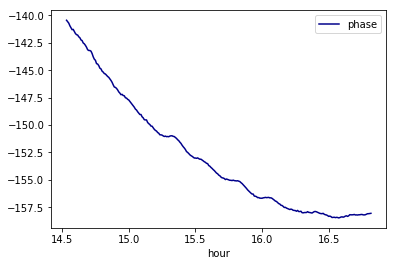

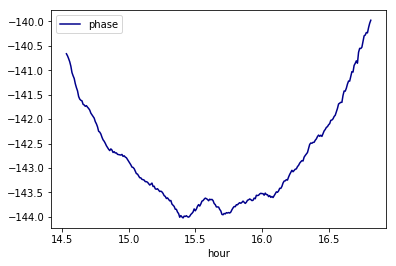

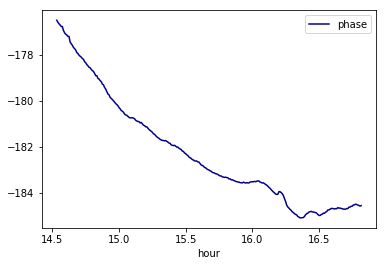

In [7]:
lat = 42.46386370313852 #shitot ot ecvat   MARKS   TPLK
lon = 78.52905690246126# dolg merid-i po ekvat
cnt =0
tb =0#63
te =275 #275

ls_files =[]
test = []
AGL =list()# dlya spiska dataFrame matrix A
BGL =list()# dlya spiska dataFrame matrix B
A2Gl = list()  
A4Gl = list()
B2Gl = list()
# Указываем папку в которой производить поиск
path='./'
for rootdir, dirs, files in os.walk(path):
    for file in files:       
        if((file.split('.')[-1])=='dat'):
            ls_files.append(file)
            #print (os.path.join(rootdir, file))
cnt_file = len(ls_files)
for i in range(cnt_file):
    t=[]
    file1 = open (ls_files[i])
    allLines = file1.readlines()
    file1linecount = len(allLines)
    file1.seek(0) # peremestit ukozatel v nachal
    for ln in range(file1linecount) :#3700 strok все строки
    #for ln in range(file1) :#3700 strok все строки
        line  = file1.readline()
        if ln > 10 :
            param=line.strip() #str
            param = param.split()
            t.append(param)
    test.append(t)
arr = np.array(test)
arr = arr.astype(float)


def Satelite_get(arr):
    G = pd.DataFrame(arr,  columns=['tsn', 'hour', 'el', 'az','phase','code','valid'])
    G['Cr']=  G['code']-G['phase'] 
    G['Coef']= ((1/G['Cr'].count())*G['Cr'].sum())
    G['sTEC']= G['phase']+G['Coef']
    G['vTEC'] =  G['sTEC']*  (np.cos  (np.arcsin(  (6400*np.cos(G['el']*3.14/180))  /  (6400+350) )  )     ) #
    G['psi'] = np.pi/2 - np.radians(G['el'])- np.arcsin(6371 * np.cos( np.radians(G['el']) )/(6371+350) ) #1.209
    G['lat']=  np.degrees(np.arcsin( np.sin(np.radians(lat)) * np.cos(G['psi']) + np.cos(np.radians(lat))*np.sin(G['psi']) *np.cos(np.radians(G['az'])) ))
    G['lon'] = np.degrees(np.radians(lon)+ np.arcsin( np.sin( G['psi'] ) * np.sin(np.radians( G['az'] ) ) * (1/np.cos( np.radians( G['lat'] )) ) )  ) 
    G['Dlat'] = np.radians(G['lat']) - np.radians(lat)
    G['Dlon'] = np.radians(G['lon']) - np.radians(lon)
    G['S'] = (np.cos(  np.arcsin( 6371* np.sin(0.97* np.radians(90-G['el']))/(6371+350) )    )**-1 )# factor naklona
    G = G[tb:te]# interval
 
    print(G.iloc[120])
    print(G.iloc[cnt])
    print(G.iloc[220])
    G.plot(x='hour',y='phase',c='DarkBlue')
    #print(G.phase)
    G['t']= G['hour'].iloc[cnt] - G['hour']
    G['w'] = 1/G['S'] *(  1+ ((2* G['t'])/(G['hour'].iloc[-1]-G['hour'].iloc[0]))**2     )**-1 # ves =  delt t / interval 
    G.drop(['psi','valid','az','el','phase','code','Cr','Coef','lat','lon','tsn','hour','vTEC'], axis=1, inplace=True) 
    G['w*S']=      (G['w'] * G['S']) 
    G['w*S*lat']=  (G['w'] * G['S'] * G['Dlat'])
    G['w*S*lat^2']=(G['w'] * G['S'] * G['Dlat']**2)
    G['w*S*lon']=  (G['w'] * G['S'] * G['Dlon'])
    G['w*S*lon^2']=(G['w'] * G['S'] * G['Dlon']**2)
    G['w*S*t']=    (G['w'] * G['S'] * G['t'])
    G['w*S*t^2']=  (G['w'] * G['S'] * G['t']**2)
    G['w*I']=       G['w'] * G['sTEC']
    G['w*S*I'] =       G['w'] * G['S']* G['sTEC']             
    G['w*S*I*lat']=    G['w'] * G['S']* G['sTEC'] * G['Dlat']
    G['w*S*I*lat^2']=  G['w'] * G['S']* G['sTEC'] * G['Dlat']**2
    G['w*S*I*lon']=    G['w'] * G['S']* G['sTEC'] * G['Dlon']
    G['w*S*I*lon^2']=  G['w'] * G['S']* G['sTEC'] * G['Dlon']**2
    G['w*S*I*t']=      G['w'] * G['S']* G['sTEC'] * G['t']
    G['w*S*I*t^2']=    G['w'] * G['S']* G['sTEC'] * G['t']**2
    G['(w)']=         G['w'].sum()#              A4
    G['(w*S)']=G['w*S'].sum()
    G['(w*S*lat)'] = G['w*S*lat'].sum()#              A2 A3
    G['(w*S*lat^2)'] = G['w*S*lat^2'].sum()#            A2 A3
    G['(w*S*lon)']= G['w*S*lon'].sum()#            A2 A3
    G['(w*S*lon^2)']= (G['w*S*lon^2']).sum()#            A2 A3
    G['(w*S*t)']= (G['w*S*t']).sum()#            A2 A3
    G['(w*S*t^2)']= (G['w*S*t^2']).sum()#            A2 A3
    G['w*S^2']=         G['w'] * G['S']**2
    G['w*S^2*lat']  =   G['w'] * G['S']**2 * G['Dlat']
    G['w*S^2*lat^2']  = G['w'] * G['S']**2 * G['Dlat']**2
    G['w*S^2*lat^3']  = G['w'] * G['S']**2 * G['Dlat']**3
    G['w*S^2*lat^4']  = G['w'] * G['S']**2 * G['Dlat']**4
    G['w*S^2*lon']  =   G['w'] * G['S']**2 * G['Dlon']
    G['w*S^2*lon^2']  = G['w'] * G['S']**2 * G['Dlon']**2
    G['w*S^2*lon^3']  = G['w'] * G['S']**2 * G['Dlon']**3
    G['w*S^2*lon^4']  = G['w'] * G['S']**2 * G['Dlon']**4
    G['w*S^2*t']  =     G['w'] * G['S']**2 * G['t']
    G['w*S^2*t^2']  =   G['w'] * G['S']**2 * G['t']**2
    G['w*S^2*t^3']  =   G['w'] * G['S']**2 * G['t']**3
    G['w*S^2*t^4']  =   G['w'] * G['S']**2 * G['t']**4
    G['w*S^2*lat*lon']  =   G['w'] * G['S']**2 * G['Dlat']* G['Dlon']
    G['w*S^2*lat^2*lon']  = G['w'] * G['S']**2 * G['Dlat']**2 * G['Dlon']
    G['w*S^2*lat*lon^2']  = G['w'] * G['S']**2 * G['Dlat']* G['Dlon']**2
    G['w*S^2*lat^2*lon^2']= G['w'] * G['S']**2 * G['Dlat']**2 * G['Dlon']**2
    G['w*S^2*lat*t']  =     G['w'] * G['S']**2 * G['Dlat'] * G['t']
    G['w*S^2*lat^2*t']  =   G['w'] * G['S']**2 * G['Dlat']**2 * G['t']
    G['w*S^2*lat*t^2']  =   G['w'] * G['S']**2 * G['Dlat'] * G['t']**2
    G['w*S^2*lat^2*t^2']=   G['w'] * G['S']**2 * G['Dlat']**2 * G['t']**2
    G['w*S^2*lon*t']  =     G['w'] * G['S']**2 * G['Dlon'] * G['t']
    G['w*S^2*lon^2*t']  =   G['w'] * G['S']**2 * G['Dlon']**2 * G['t']
    G['w*S^2*lon*t^2']  =   G['w'] * G['S']**2 * G['Dlon'] * G['t']**2
    G['w*S^2*lon^2*t^2']=   G['w'] * G['S']**2 * G['Dlon']**2 * G['t']**2
    G['(w*S^2)']             =G['w*S^2'].sum() 
    G['(w*S^2*lat)']         =G['w*S^2*lat'].sum()
    G['(w*S^2*lat^2)']       =G['w*S^2*lat^2'].sum()
    G['(w*S^2*lat^3)']       =G['w*S^2*lat^3'].sum()
    G['(w*S^2*lat^4)']       =G['w*S^2*lat^4'].sum()
    G['(w*S^2*lon)']         =G['w*S^2*lon'].sum()
    G['(w*S^2*lon^2)']       =G['w*S^2*lon^2'].sum()
    G['(w*S^2*lon^3)']       =G['w*S^2*lon^3'].sum()
    G['(w*S^2*lon^4)']       =G['w*S^2*lon^4'].sum()
    G['(w*S^2*t)']           =G['w*S^2*t'].sum() 
    G['(w*S^2*t^2)']         =G['w*S^2*t^2'].sum()
    G['(w*S^2*t^3)']         =G['w*S^2*t^3'].sum()
    G['(w*S^2*t^4)']         =G['w*S^2*t^4'].sum()
    G['(w*S^2*lat*lon)']     =G['w*S^2*lat*lon'].sum() 
    G['(w*S^2*lat^2*lon)']   =G['w*S^2*lat^2*lon'].sum()
    G['(w*S^2*lat*lon^2)']   =G['w*S^2*lat*lon^2'].sum()
    G['(w*S^2*lat^2*lon^2)'] =G['w*S^2*lat^2*lon^2'].sum()
    G['(w*S^2*lat*t)']       =G['w*S^2*lat*t'].sum() 
    G['(w*S^2*lat^2*t)']     =G['w*S^2*lat^2*t'].sum()
    G['(w*S^2*lat*t^2)']     =G['w*S^2*lat*t^2'].sum()
    G['(w*S^2*lat^2*t^2)']   =G['w*S^2*lat^2*t^2'].sum()
    G['(w*S^2*lon*t)']       =G['w*S^2*lon*t'].sum()
    G['(w*S^2*lon^2*t)']     =G['w*S^2*lon^2*t'].sum()
    G['(w*S^2*lon*t^2)']     =G['w*S^2*lon*t^2'].sum()
    G['(w*S^2*lon^2*t^2)']   =G['w*S^2*lon^2*t^2'].sum()  
    G['(w*S*I)']     = G['w*S*I'].sum()   
    G['(w*S*I*lat)']  = G['w*S*I*lat'].sum()
    G['(w*S*I*lat^2)']= G['w*S*I*lat^2'].sum()
    G['(w*S*I*lon)']  = G['w*S*I*lon'].sum() 
    G['(w*S*I*lon^2)']= G['w*S*I*lon^2'].sum()
    G['(w*S*I*t)']    = G['w*S*I*t'].sum()  
    G['(w*S*I*t^2)']  = G['w*S*I*t^2'].sum() 
    #GG = G.loc[:tb,['(w*S^2)','(w*S^2*lat)','(w*S^2*lat^2)','(w*S^2*lat^3)','(w*S^2*lat^4)','(w*S^2*lon)','(w*S^2*lon^2)','(w*S^2*lon^3)','(w*S^2*lon^4)','(w*S^2*t)','(w*S^2*t^2)','(w*S^2*t^3)','(w*S^2*t^4)','(w*S^2*lat*lon)','(w*S^2*lat^2*lon)','(w*S^2*lat*lon^2)','(w*S^2*lat^2*lon^2)','(w*S^2*lat*t)','(w*S^2*lat^2*t)','(w*S^2*lat*t^2)','(w*S^2*lat^2*t^2)','(w*S^2*lon*t)','(w*S^2*lon^2*t)','(w*S^2*lon*t^2)','(w*S^2*lon^2*t^2)']]
    #BG = G.loc[:tb,['(w*S*I)','(w*S*I*lat)','(w*S*I*lat^2)','(w*S*I*lon)','(w*S*I*lon^2)','(w*S*I*t)','(w*S*I*t^2)']]           
    G['(w*I)'] = G['w*I'].sum()  #               b2   
    return G

def matrix_sum(PD_list):
    #print(PD_list[0])
    if(cnt_file==1):
        res = PD_list[0]
    elif(cnt_file==2):
        res = PD_list[0]+PD_list[1]
    elif(cnt_file==3):
        res = PD_list[0]+PD_list[1]+PD_list[2]
    elif(cnt_file==4):
        res = PD_list[0]+PD_list[1]+PD_list[2]+PD_list[3]  
    elif(cnt_file==5):
        res = PD_list[0]+PD_list[1]+PD_list[2]+PD_list[3]+ PD_list[4]    
    elif(cnt_file==6):
        res = PD_list[0]+PD_list[1]+PD_list[2]+PD_list[3]+ PD_list[4]+PD_list[5]
    elif(cnt_file==7):
        res = PD_list[0]+PD_list[1]+PD_list[2]+PD_list[3]+ PD_list[4]+PD_list[5]++PD_list[6]     
      
    return res 
   
def matrix_sec(Data_list):
#    if(cnt_file==4):
#        res_2 = np.array([Data_list[0],Data_list[1],Data_list[2],Data_list[3]])
    if(cnt_file==3):
        res_2 = np.array([Data_list[0],Data_list[1],Data_list[2]])
    elif(cnt_file==4):
        res_2 = np.array([Data_list[0],Data_list[1],Data_list[2],Data_list[3]])    
    elif(cnt_file==5):
        res_2 = np.array([Data_list[0],Data_list[1],Data_list[2],Data_list[3],Data_list[4]])
    elif(cnt_file==6):
        res_2 = np.array([Data_list[0],Data_list[1],Data_list[2],Data_list[3],Data_list[4],Data_list[5]])  
    elif(cnt_file==7):
        res_2 = np.array([Data_list[0],Data_list[1],Data_list[2],Data_list[3],Data_list[4],Data_list[5],Data_list[6]])      
    return res_2

def matrix_4(Data_list):
    #print(PD_list[0])
    
    if(cnt_file==3):
        A_2 = np.array([[Data_list[0][0], 0,  0 ],
                        [0, Data_list[1][0], 0 ],
                        [0,  0, Data_list[2][0] ],])
    elif(cnt_file==4):
        A_2 = np.array([[Data_list[0][0], 0,  0, 0 ],
                        [0, Data_list[1][0], 0, 0 ],
                        [0,  0, Data_list[2][0],0 ],
                        [0,  0,  0, Data_list[3][0] ],])
    elif(cnt_file==5):
        A_2 = np.array([[Data_list[0][0], 0,  0, 0,  0 ],
                        [0, Data_list[1][0], 0, 0,  0 ],
                        [0,  0, Data_list[2][0],0,  0 ],
                        [0,  0,  0, Data_list[3][0],0 ],
                        [0, 0,  0,   0,Data_list[4][0] ],])
        
    elif(cnt_file==6):
        A_2 = np.array([[Data_list[0][0],  0,  0,  0,  0,  0 ],
                        [0, Data_list[1][0],  0,  0,  0,   0 ],
                        [0,  0, Data_list[2][0],  0,  0,   0 ],
                        [0,  0,  0, Data_list[3][0],  0,   0 ],
                        [0,  0,  0,   0, Data_list[4][0],  0 ],
                        [0,  0,  0,   0,   0,Data_list[5][0] ],
                       ])
    elif(cnt_file==7):
        A_2 = np.array([[Data_list[0][0],  0,  0,  0,  0,  0, 0 ],
                        [0, Data_list[1][0],  0,  0,  0,   0, 0 ],
                        [0,  0, Data_list[2][0],  0,  0,   0, 0 ],
                        [0,  0,  0, Data_list[3][0],  0,   0, 0 ],
                        [0,  0,  0,   0, Data_list[4][0],  0, 0 ],
                        [0,  0,  0,   0,   0,  Data_list[5][0], 0 ],
                        [0,  0,  0,   0,   0, 0,  Data_list[5][0] ],
                       ])
        
    return A_2

for i in range(0,cnt_file):
    G = Satelite_get(arr[i])
    #GG='G{lit}'.format(lit = i)
    AG = G.loc[:tb,['(w*S^2)','(w*S^2*lat)','(w*S^2*lat^2)','(w*S^2*lat^3)','(w*S^2*lat^4)','(w*S^2*lon)','(w*S^2*lon^2)','(w*S^2*lon^3)','(w*S^2*lon^4)','(w*S^2*t)','(w*S^2*t^2)','(w*S^2*t^3)','(w*S^2*t^4)','(w*S^2*lat*lon)','(w*S^2*lat^2*lon)','(w*S^2*lat*lon^2)','(w*S^2*lat^2*lon^2)','(w*S^2*lat*t)','(w*S^2*lat^2*t)','(w*S^2*lat*t^2)','(w*S^2*lat^2*t^2)','(w*S^2*lon*t)','(w*S^2*lon^2*t)','(w*S^2*lon*t^2)','(w*S^2*lon^2*t^2)']]
    BG = G.loc[:tb,['(w*S*I)','(w*S*I*lat)','(w*S*I*lat^2)','(w*S*I*lon)','(w*S*I*lon^2)','(w*S*I*t)','(w*S*I*t^2)']]   
    A2G = G.loc[:tb,['(w*S)','(w*S*lat)','(w*S*lat^2)','(w*S*lon)','(w*S*lon^2)','(w*S*t)','(w*S*t^2)']]
    A4G = G.loc[:tb,['(w)']]
    B2G = G.loc[:tb,['(w*I)']]
    csv = 'G{lit}.csv'.format(lit = i)
   
    BGL.append(BG)
    AGL.append(AG)
    
    A2Gl.append(A2G.values[0].tolist())
    A4Gl.append(A4G.values[0].tolist())
    B2Gl.append(B2G.values[0].tolist())
    
B_1 = matrix_sum(BGL)    # vsegda odin razmer 
A_1 = matrix_sum(AGL)    # vsegda odin razmer


A = A_1.values.tolist()
B = B_1.values.tolist()
B = np.array([B[0][0], 
            B[0][1], 
            B[0][2], 
            B[0][3], 
            B[0][4], 
            B[0][5],
            B[0][6]])

AA =  np.array([
    [A[0][0], A[0][1], A[0][2], A[0][5],  A[0][6],  A[0][9],  A[0][10]  ],
    [A[0][1], A[0][2], A[0][3], A[0][13], A[0][15], A[0][17], A[0][19]  ],
    [A[0][2], A[0][3], A[0][4], A[0][14], A[0][16], A[0][18], A[0][20]  ],
    [A[0][5], A[0][13], A[0][14], A[0][6], A[0][7], A[0][21], A[0][23]  ],
    [A[0][6], A[0][15], A[0][16], A[0][7], A[0][8], A[0][22], A[0][24]  ],
    [A[0][9], A[0][17], A[0][18], A[0][21], A[0][22], A[0][10],A[0][11] ],
    [A[0][10], A[0][19], A[0][20], A[0][23], A[0][24], A[0][11],A[0][12]],
    ])

#A1



A2 = matrix_sec(A2Gl)
A3 = matrix_sec(A2Gl)
B2 = matrix_sec(B2Gl)
A4 = matrix_4(A4Gl)
A2 = A2.T
AAA2 = np.concatenate((AA, A2), axis=1)
A3A4 = np.concatenate((A3, A4), axis=1)
Amain = np.append([AAA2],[A3A4], axis=1)
BB= np.append(B,B2)
matrixA =  pd.DataFrame(Amain[0])
matrixB =  pd.DataFrame(BB,columns =['b'])
matrix = pd.concat([matrixA,matrixB],axis=1)

matrix.to_csv('AB.csv',sep=';',index=False)
#matrix
mat_A = pd.read_csv ('AB.csv',sep = ';')
mat_B = mat_A['b']

mat_A.drop(['b'], axis=1, inplace=True)

bbb = mat_B.values
AAA = mat_A.values


w = np.linalg.lstsq(AAA.T, bbb, rcond=None)[0]

x = pd.Series(w) 
x
#matrix

In [11]:
mat_A = pd.read_csv ('AB.csv',sep = ';')
mat_B = mat_A['b']

mat_A.drop(['b'], axis=1, inplace=True)

bbb = mat_B.values
AAA = mat_A.values

w = np.linalg.lstsq(AAA.T, bbb, rcond=None)[0]

x = pd.Series(w) 
x

0        8.567381
1      157.879692
2    -1263.538268
3       56.143843
4      174.482877
5        5.499732
6        4.196560
7      104.054618
8       96.616441
9       87.805033
10      78.629493
11     109.365069
dtype: float64

In [41]:
rad=0.01745
x = list()
sx=120
sy=120
r=76
a = 136
i = 0
while a!=44:
    
    x =r*np.cos(rad*a)+sx;
    print(x)
    a+=1
    i+=1
    print(i)
    if(a==360):a=0

65.35382091108019
1
64.44050440606014
2
63.5441054770536
3
62.664897072849264
4
61.80314690781079
5
60.959117380359295
6
60.133065493074405
7
59.32524277443819
8
58.535895202246245
9
57.76526312870855
10
57.01358120726365
11
56.28107832112773
12
55.56797751360105
13
54.87449592015234
14
54.200844702302106
15
53.547228983325226
16
52.913847785791816
17
52.300893970966044
18
51.70855418008075
19
51.13700877750628
20
50.58643179583039
21
50.05699088286626
22
49.548847250604666
23
49.0621556261257
24
48.59706420448519
25
48.15371460359012
26
47.7322418210767
27
47.33277419320427
28
46.9554333557776
29
46.60033420710944
30
46.26758487303454
31
45.957286673985934
32
45.6695340941434
33
45.40441475266347
34
45.16200937699993
35
44.94239177832269
36
44.74562882904263
37
44.57178044244941
38
44.42089955446808
39
44.29303210754041
40
44.18821703663566
41
44.10648625739509
42
44.04786465641379
43
44.012370083662844
44
44.00001334705415
45
44.01079820914943
46
44.0447213860145
47
44.10177254821937

In [150]:
#data = [{'a':1,'b':2,'c':3}]
#da =pd.DataFrame(data)
#da2 = da.copy()
#import copy
#x = [[3, 6, 9, 12, 15, 18],
#     [3, 6, 9, 12, 15, 18]]
#y = clone(a)
#y = copy.deepcopy(x) 
#y[1][0] = 20000
#x,y
a = np.array([[1,2,3,4],[1,2,3,5]])
b = a.copy()
#b = copy.deepcopy(a)
b[0][1]=20
##da2['a']=20
#da, da2
a,b

(array([[1, 2, 3, 4],
        [1, 2, 3, 5]]), array([[ 1, 20,  3,  4],
        [ 1,  2,  3,  5]]))